In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
# Rastrigin function
def f1(cur_position):
    return  (cur_position[0]**2 - 10 * np.cos(2 * np.pi * cur_position[0])) + (cur_position[1]**2 - 10 * np.cos(2 * np.pi * cur_position[1])) + 20
# Beale function
def f2(cur_position):
    return (1.5-cur_position[0]+cur_position[0]*cur_position[1])**2 + (2.25-cur_position[0]+cur_position[0]*(cur_position[1]**2))**2 + (2.625 - cur_position[0] +cur_position[0]*(cur_position[1]**3))**2
#Himmelblau's function
def f3(cur_position):
    x = cur_position[0]
    y = cur_position[1]
    return (x**2 + y -11)**2 + (x+ y**2 - 7)**2

def f4(cur_position):
    x = cur_position[0]
    y = cur_position[1]
    k = math.sin(x) * math.sin(y)
    k1 = math.sqrt(x**2+y**2)/math.pi
    y = 1/10
    return -0.0001*(abs(k*math.exp(abs(100-k1)))+1)**y
# Cross-in-tray function

# Rastrigin function 10 variable
def f5(cur_position):
    sum = 0
    for i in range(0,10):
        sum += 10 + cur_position[i]**2 - 10*math.cos(2*math.pi*cur_position[i])
    return sum

In [3]:
#Cac ham de ve
def f1_1(x,y):
    return  (x**2 - 10 * np.cos(2 * np.pi * x)) + \
           (y**2 - 10 * np.cos(2 * np.pi * y)) + 20
def f2_2(x,y): 
    return (1.5-x+x*y)**2 + (2.25-x+x*(y**2))**2 \
            + (2.625 - x +x*(y**3))**2
def f3_3(x,y):
    return (x**2 + y -11)**2 + (x+ y**2 - 7)**2
def f4_4(x,y):
  
    k = np.sin(x) * np.sin(y)
    k1 = np.sqrt(x**2+y**2)/np.pi
    return -0.0001*(abs(k*np.exp(abs(100-k1)))+1)**0.1

In [4]:
def Star_Neighbor(gbest_position,gbest_fitness_value,n_particles,particle_position_vector,funtion):
    for i in range(n_particles):
        fitness = funtion(particle_position_vector[i])
        if gbest_fitness_value > fitness:
            gbest_fitness_value = fitness
            gbest_position = particle_position_vector[i]
    return gbest_fitness_value, gbest_position


In [5]:
def Ring(Zeroes,n_particles):          
    
    for i in range(0,n_particles):
        N = Zeroes[i]
        if i>= n_particles - 2:
            if i == n_particles - 2:
                N[0] = i
                N[1] = i + 1
                N[2] = 0
            else: 
                N[0] = i 
                N[1] = 0
                N[2] = 1
        else:
            N[0] = i
            N[1] = i+1
            N[2] = i+2
    return Zeroes

In [6]:
def Ring_Neighbor(n_particles,gbest_position_ring,gbest_fitness_value_ring,particle_position_vector,N,funtion):    
    for i in range(n_particles):
        A = N[i]
        for j in range(3):
            fitness = f2(particle_position_vector[A[j]])
            if gbest_fitness_value_ring[i] > fitness:
                gbest_fitness_value_ring[i] = fitness
                gbest_position_ring[i] = particle_position_vector[A[j]]
    return gbest_position_ring, gbest_fitness_value_ring

## Star topology

In [7]:
def Run_Star(funtion_fitness,funtion_plot,xmax,xmin,ymax,ymin):

    x = xmax-xmin
    
    y = ymax - ymin

#Khoi tao so ngau nhien trong khoang (vmin,vmax): v = vmax - vmin  //  v*np.random.rand()+vmax


#Initilize Particles: 
    n_particles = 32
    particle_position_vector = np.array([np.array([ x*np.random.rand()+xmin,   #Mien gia tri x(xmin,xmax)
             y*np.random.rand()+ymin])  for _ in range(n_particles)])        #Mien gia tri y(ymin,ymax)

    pbest_position = particle_position_vector
    pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])

    gbest_fitness_value = float('inf')
    gbest_position = np.array([0, 0])

    velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])




    w = 0.7298
    c1 = c2 = 1.49618
    r1=np.random.rand()
    r2=np.random.rand()
    n_iterations = 51
    iteration = 1



    while iteration < n_iterations:
    
        print("Gen {}: ".format(iteration))
    #Scatter cac diem du lieu
        x = np.linspace(-8, 8, 30)
        y = np.linspace(-8, 8,30)
        X, Y = np.meshgrid(x, y)
        Z = funtion_plot (X, Y)
        i = particle_position_vector[:,0]
        j = particle_position_vector[:,1]
    # Ve do thi ham so (countours)
        contours = plt.contour(X, Y, Z, 3, colors='white')
        plt.clabel(contours, inline=True, fontsize=8)
        plt.imshow(Z, extent=[-8, 8, -8, 8], origin='lower',cmap='RdGy', alpha=0.5)
        plt.colorbar();
    #scatter particles
        plt.scatter(i,j,color='black')
    #scatter min funtion:
        plt.scatter(1.34941,-1.34941,color='red')
        plt.scatter(-1.34941,-1.34941,color='red')
        plt.scatter(-1.34941,1.34941,color='red')
        plt.scatter(1.34941,1.34941,color='red')
        plt.show()
    
    #Tinh gia tri fitness
        fitness = []
        for i in range(n_particles):
        #evaluate f(x): 
            fitness.append(funtion_fitness(particle_position_vector[i]))
            np.array([fitness])
        #print(fitness)

        # if f(x) < pbest: pbest = x 
        for i in range(n_particles):
            if(pbest_fitness_value[i] > fitness[i]):
                pbest_fitness_value[i] = fitness[i]
                pbest_position[i] = particle_position_vector[i]
    #print("best values: p",i,pbest_fitness_value[i])
    
        gbest_fitness_value,gbest_position = Star_Neighbor(gbest_position,gbest_fitness_value,n_particles,particle_position_vector,funtion_fitness)
        print(gbest_fitness_value)
    
    
        for i in range(n_particles):  
        #update v:
            new_velocity = (w*velocity_vector[i]) + (c1*np.random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*np.random.random()) * (gbest_position-particle_position_vector[i])
        #update x: 
            new_position = new_velocity + particle_position_vector[i]
            particle_position_vector[i] = new_position 
        
        iteration+=1   
        

Gen 1: 


-2.031762415800693
Gen 2: 


-2.05709843102202
Gen 3: 


-2.0603906568614136
Gen 4: 


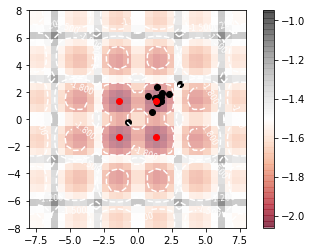

-2.0616933559864297
Gen 5: 


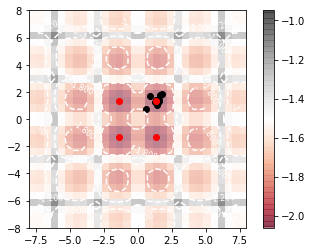

-2.0624521350568745
Gen 6: 


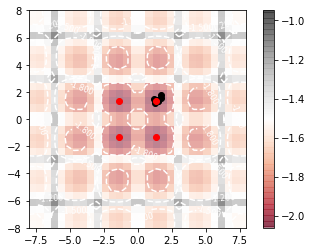

-2.062595234884233
Gen 7: 


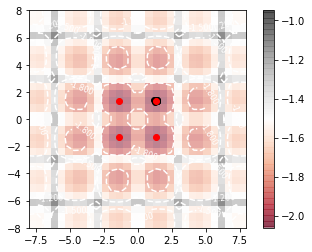

-2.0626095304755
Gen 8: 


-2.0626111832515845
Gen 9: 


-2.062611856318382
Gen 10: 


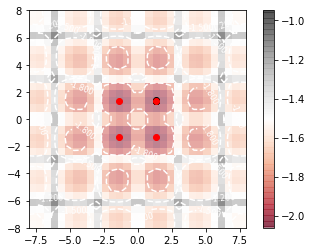

-2.062611860305725
Gen 11: 


-2.0626118644975833
Gen 12: 


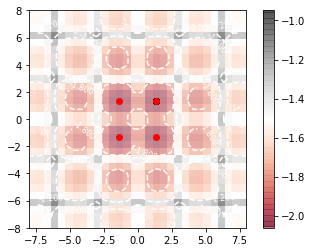

-2.062611866852955
Gen 13: 


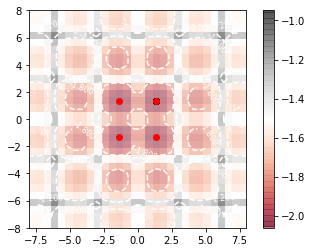

-2.062611870432309
Gen 14: 


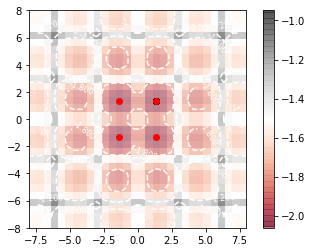

-2.062611870779245
Gen 15: 


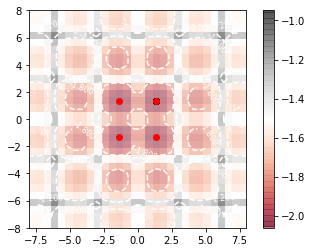

-2.0626118707959877
Gen 16: 


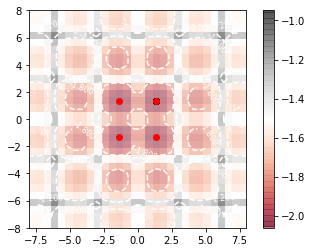

-2.0626118708138885
Gen 17: 


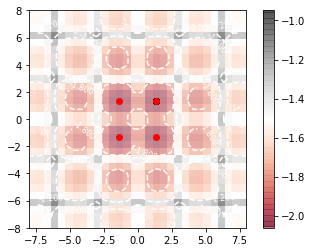

-2.0626118708208154
Gen 18: 


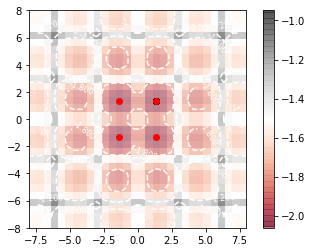

-2.062611870821665
Gen 19: 


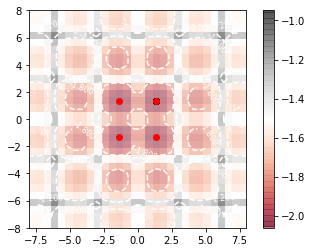

-2.0626118708217978
Gen 20: 


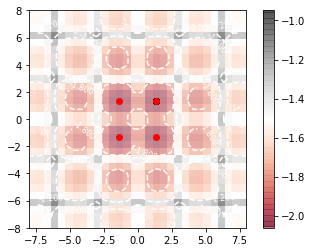

-2.062611870822082
Gen 21: 


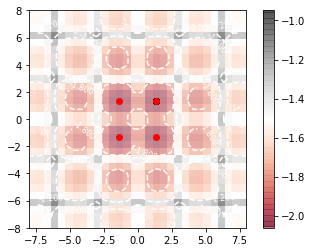

-2.062611870822202
Gen 22: 


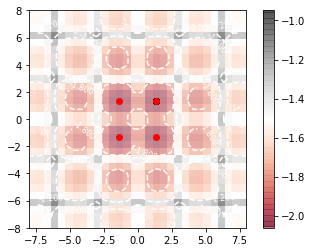

-2.0626118708224177
Gen 23: 


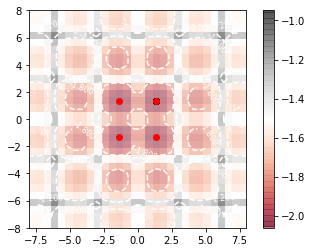

-2.062611870822512
Gen 24: 


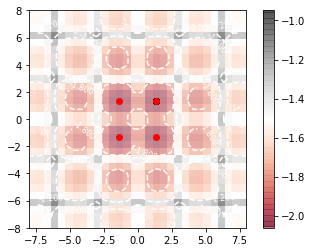

-2.0626118708225762
Gen 25: 


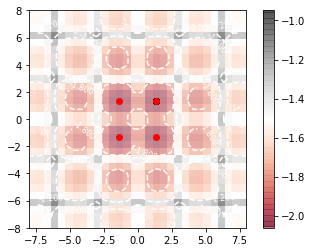

-2.0626118708226078
Gen 26: 


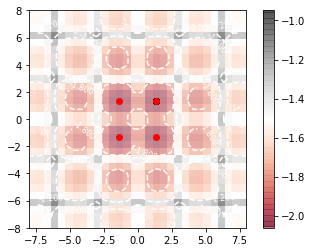

-2.0626118708226113
Gen 27: 


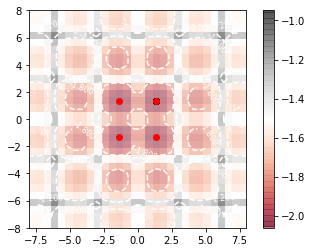

-2.0626118708226113
Gen 28: 


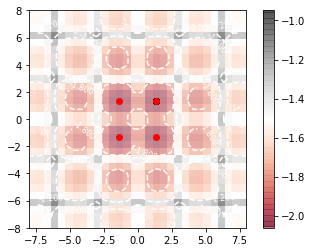

-2.0626118708226113
Gen 29: 


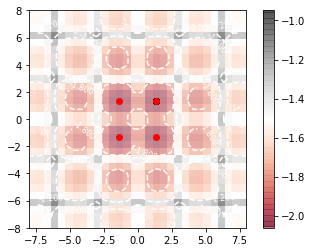

-2.0626118708226113
Gen 30: 


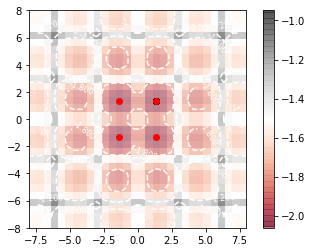

-2.0626118708226113
Gen 31: 


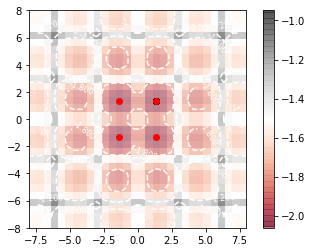

-2.0626118708226113
Gen 32: 


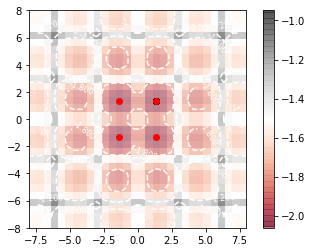

-2.0626118708226113
Gen 33: 


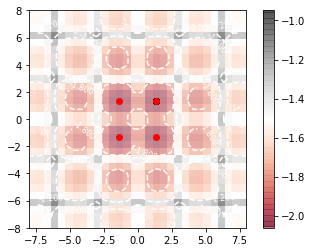

-2.0626118708226113
Gen 34: 


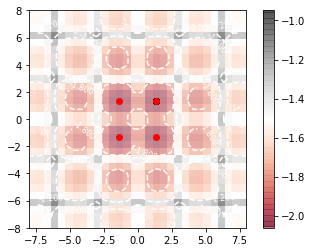

-2.0626118708226113
Gen 35: 


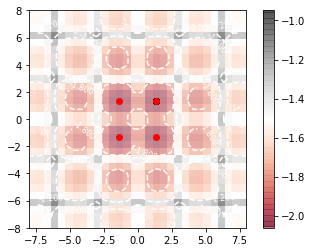

-2.0626118708226113
Gen 36: 


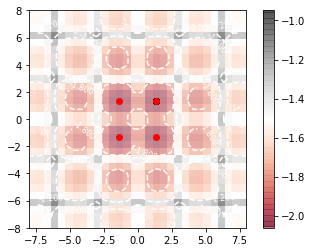

-2.0626118708226113
Gen 37: 


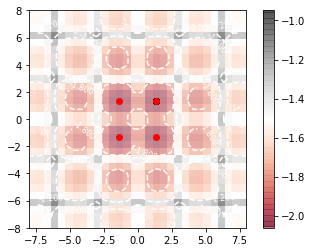

-2.0626118708226113
Gen 38: 


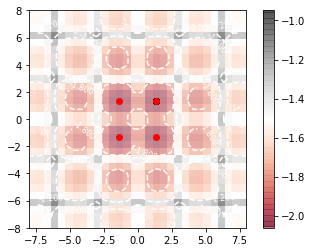

-2.0626118708226113
Gen 39: 


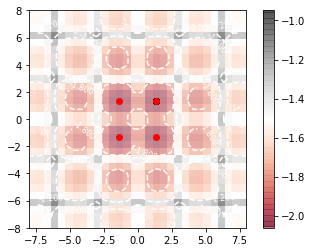

-2.0626118708226113
Gen 40: 


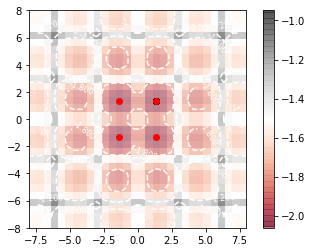

-2.0626118708226113
Gen 41: 


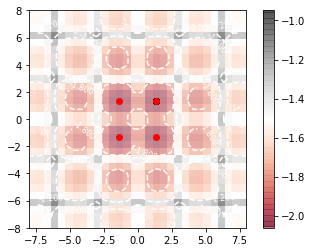

-2.0626118708226113
Gen 42: 


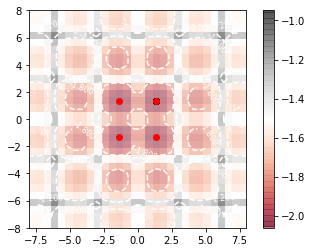

-2.0626118708226113
Gen 43: 


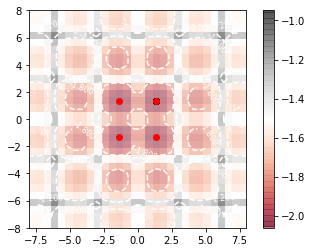

-2.0626118708226113
Gen 44: 


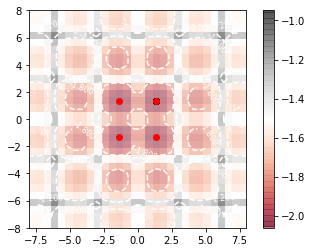

-2.0626118708226113
Gen 45: 


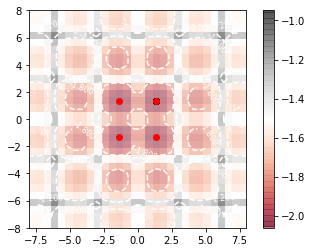

-2.0626118708226113
Gen 46: 


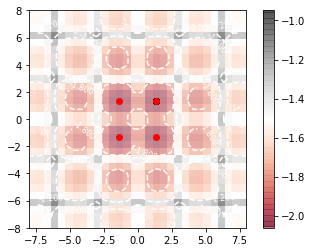

-2.0626118708226113
Gen 47: 


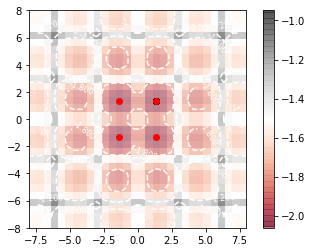

-2.0626118708226113
Gen 48: 


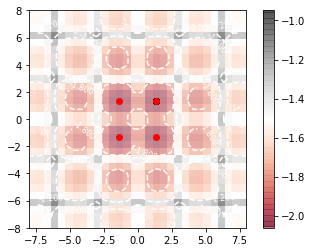

-2.0626118708226113
Gen 49: 


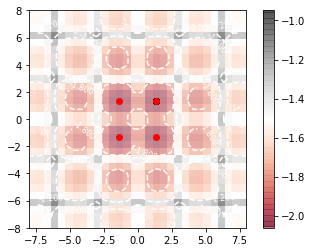

-2.0626118708226113
Gen 50: 


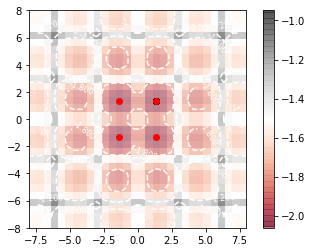

-2.0626118708226113


In [8]:
np.random.seed(1087)
A = Run_Star(f4,f4_4,6,-5,5,-6)
A

# Ring topology


In [14]:
def Run_Ring(funtion_fitness,funtion_plot,xmax,xmin,ymax,ymin):
  
    np.random.seed(1087)

#Initilize range of funtion:
  
    x = xmax-xmin

    y = ymax - ymin

#Khoi tao so ngau nhien trong khoang (vmin,vmax): v = vmax - vmin  //  v*np.random.rand()+vmax


#Initilize Particles: 
    n_particles = 32
    particle_position_vector = np.array([np.array([ x*np.random.rand()+xmin,   #Mien gia tri x
                 y*np.random.rand()+ymin])  for _ in range(n_particles)])      #Mien gia tri y
    pbest_position = particle_position_vector
    pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])


    gbest_fitness_value_ring = ([np.array([float('inf')]) for _ in range(n_particles)])

    gbest_position = ([np.array([0, 0]) for _ in range(n_particles)])

    Zeroes  = ([np.array([0, 0, 0]) for _ in range(n_particles)])
    velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])

#velocity_vector = ([np.array([np.random.rand(), np.random.rand()]) for _ in range(2)])

    w = 0.7298
    c1 = c2 = 1.49618
    r1=np.random.rand()
    r2=np.random.rand()
    n_iterations = 51
    iteration = 1



    while iteration < n_iterations:
     
        print("Gen {}: ".format(iteration))
    #Scatter cac diem du lieu
        x = np.linspace(-8, 8, 30)
        y = np.linspace(-8, 8,30)
        X, Y = np.meshgrid(x, y)
        Z = funtion_plot (X, Y)
        i = particle_position_vector[:,0]
        j = particle_position_vector[:,1]
    # Ve do thi ham so (countours)
        contours = plt.contour(X, Y, Z, 3, colors='black')
        plt.clabel(contours, inline=True, fontsize=8)
        plt.imshow(Z, extent=[-8, 8, -8, 8], origin='lower',cmap='RdGy', alpha=0.5)
        plt.colorbar();
        plt.scatter(i,j,color='blue')
    
    #scatter min funtion
        plt.scatter(1.34941,-1.34941,color='red')
        plt.scatter(-1.34941,-1.34941,color='red')
        plt.scatter(-1.34941,1.34941,color='red')
        plt.scatter(1.34941,1.34941,color='red')
        plt.show()
        # if f(x) < pbest: pbest = x 
        fitness = []
    
    
    
        for i in range(n_particles):
        #evaluate f(x): 
            fitness.append(funtion_fitness(particle_position_vector[i]))
            np.array([fitness])
        #print(particle_position_vector, " ",fitness)
    
   
        for i in range(n_particles):
            Y = Ring(Zeroes,n_particles)
            N = Y[i]
            for j in range(3):
            ## goi Ham de tinh fitness va so sanh voi cac neighbor khac
                fitness = funtion_fitness(particle_position_vector[N[j]])
                if gbest_fitness_value_ring[i] > fitness:
                    gbest_fitness_value_ring[i] = fitness
                    gbest_position[i] = particle_position_vector[N[j]]
    
    #print("best fitness ring:  ",gbest_fitness_value_ring)
        print("Min in best ring: ", min(gbest_fitness_value_ring))
    
        for i in range(n_particles):  
        #update v:
            new_velocity = (w*velocity_vector[i]) + (c1*np.random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*np.random.random()) * (gbest_position[i]-particle_position_vector[i])
        #update x: 
            new_position = new_velocity + particle_position_vector[i]
            particle_position_vector[i] = new_position 
        
        iteration+=1
    
    
        
        
        
        
        
    

Gen 1: 


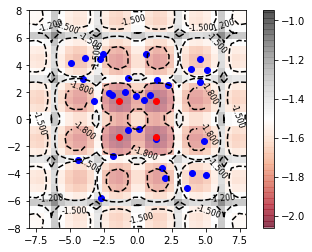

Min in best ring:  -2.061688134016156
Gen 2: 


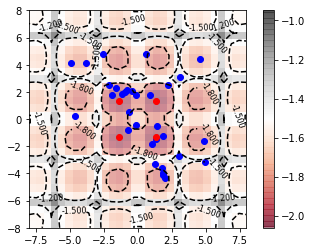

Min in best ring:  -2.061688134016156
Gen 3: 


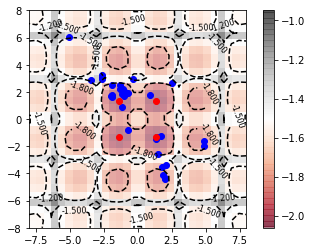

Min in best ring:  -2.061688134016156
Gen 4: 


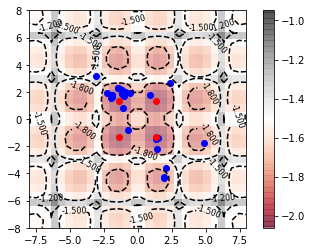

Min in best ring:  -2.061862826045441
Gen 5: 


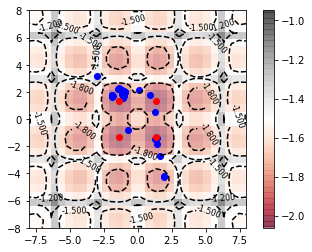

Min in best ring:  -2.061889821585026
Gen 6: 


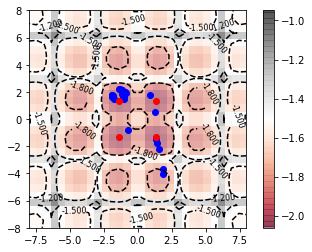

Min in best ring:  -2.0619295165331977
Gen 7: 


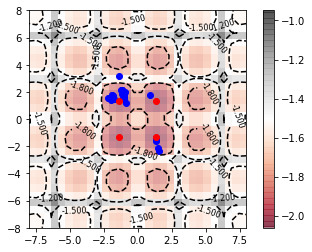

Min in best ring:  -2.061930063477197
Gen 8: 


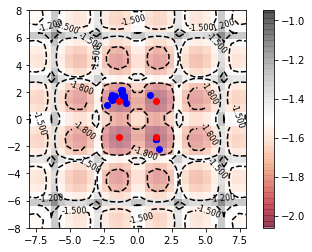

Min in best ring:  -2.061930063477197
Gen 9: 


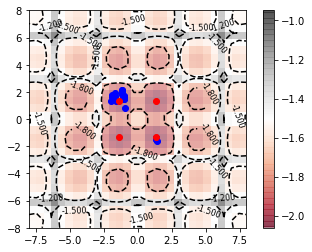

Min in best ring:  -2.0619531597963254
Gen 10: 


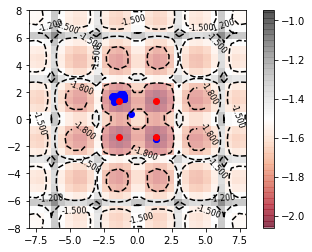

Min in best ring:  -2.0621097803835524
Gen 11: 


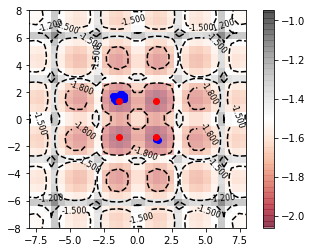

Min in best ring:  -2.0621097803835524
Gen 12: 


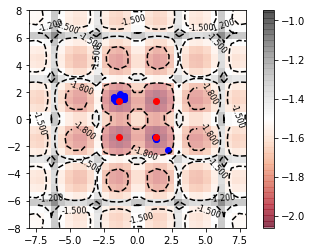

Min in best ring:  -2.0621097803835524
Gen 13: 


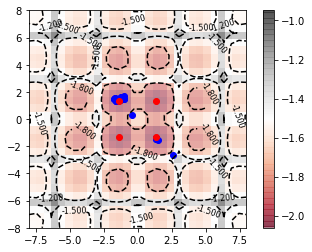

Min in best ring:  -2.062229886582698
Gen 14: 


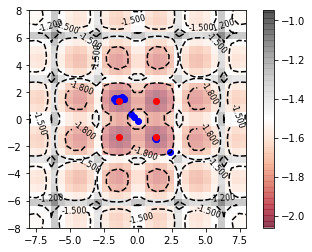

Min in best ring:  -2.0623586422001425
Gen 15: 


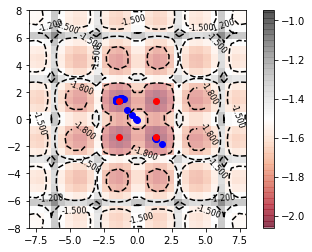

Min in best ring:  -2.0623586422001425
Gen 16: 


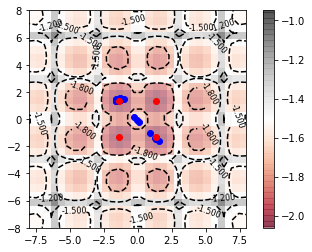

Min in best ring:  -2.0624111706211417
Gen 17: 


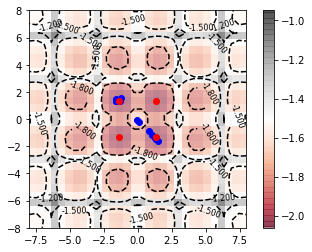

Min in best ring:  -2.0624407380016567
Gen 18: 


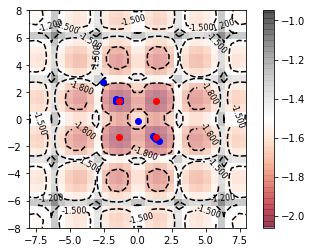

Min in best ring:  -2.0624407380016567
Gen 19: 


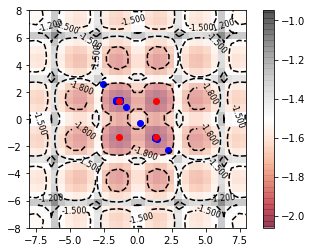

Min in best ring:  -2.0624407380016567
Gen 20: 


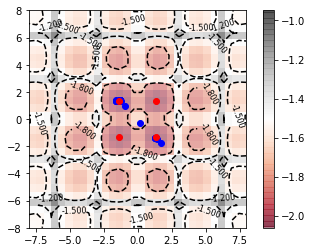

Min in best ring:  -2.0624407380016567
Gen 21: 


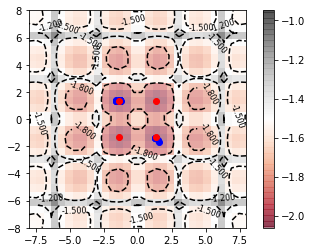

Min in best ring:  -2.0624428420414835
Gen 22: 


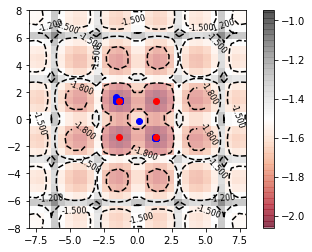

Min in best ring:  -2.062444059735468
Gen 23: 


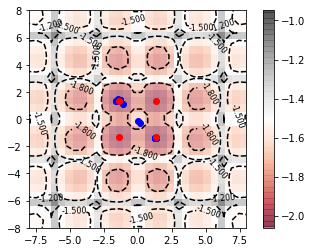

Min in best ring:  -2.062448948935324
Gen 24: 


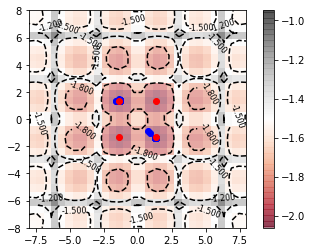

Min in best ring:  -2.062448948935324
Gen 25: 


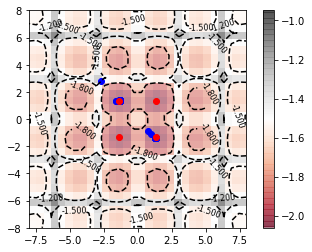

Min in best ring:  -2.06245890367135
Gen 26: 


Min in best ring:  -2.06245890367135
Gen 27: 


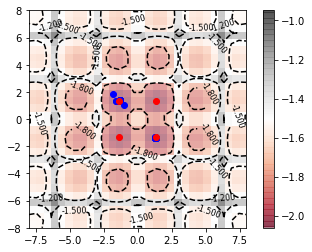

Min in best ring:  -2.06245890367135
Gen 28: 


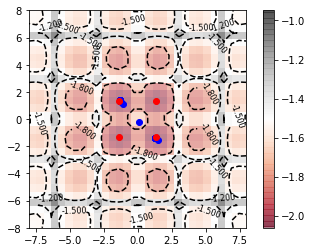

Min in best ring:  -2.06245890367135
Gen 29: 


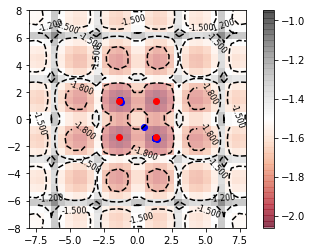

Min in best ring:  -2.06245890367135
Gen 30: 


Min in best ring:  -2.06245890367135
Gen 31: 


Min in best ring:  -2.06245890367135
Gen 32: 


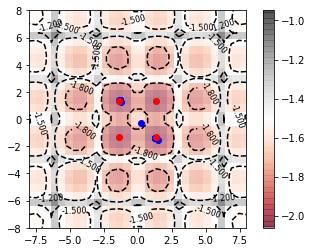

Min in best ring:  -2.06245890367135
Gen 33: 


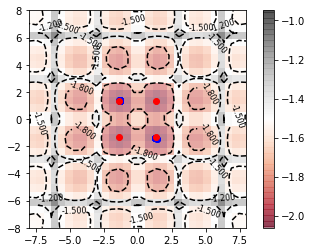

Min in best ring:  -2.06245890367135
Gen 34: 


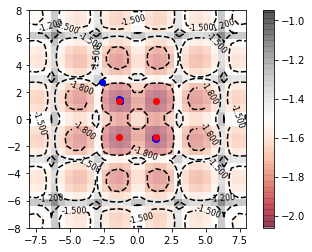

Min in best ring:  -2.0624600486345495
Gen 35: 


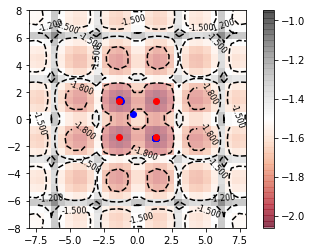

Min in best ring:  -2.0624600486345495
Gen 36: 


Min in best ring:  -2.0624600486345495
Gen 37: 


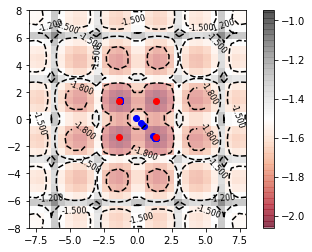

Min in best ring:  -2.0624600486345495
Gen 38: 


Min in best ring:  -2.062468554547392
Gen 39: 


Min in best ring:  -2.062468554547392
Gen 40: 


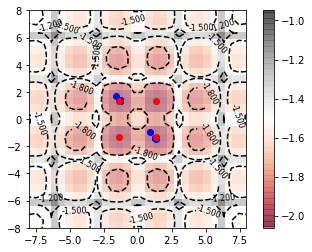

Min in best ring:  -2.062468554547392
Gen 41: 


Min in best ring:  -2.0624686233136584
Gen 42: 


Min in best ring:  -2.0624686233136584
Gen 43: 


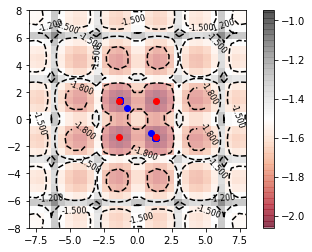

Min in best ring:  -2.062473162082477
Gen 44: 


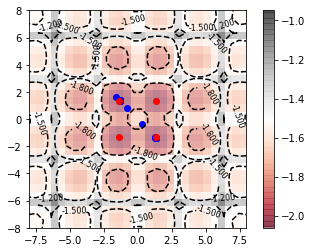

Min in best ring:  -2.0624733532982416
Gen 45: 


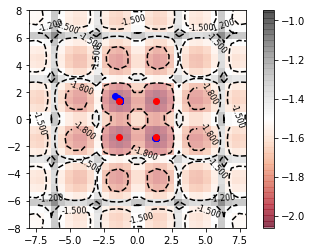

Min in best ring:  -2.0624734056400196
Gen 46: 


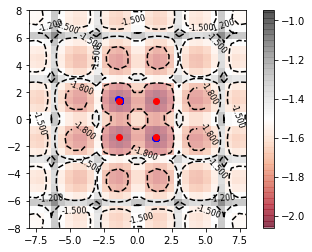

Min in best ring:  -2.0624734056400196
Gen 47: 


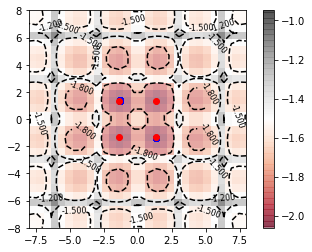

Min in best ring:  -2.0624734056400196
Gen 48: 


Min in best ring:  -2.0624734056400196
Gen 49: 


Min in best ring:  -2.0624734056400196
Gen 50: 


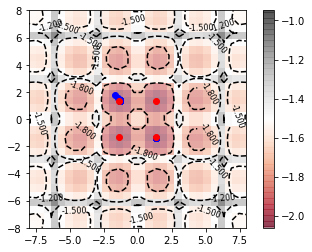

Min in best ring:  -2.0624734056400196


In [15]:
np.random.seed(1087)
X = Run_Ring(f4,f4_4,6,-5,5,-6)

## Rastrigin with 10 variables

## Star Topology

In [ ]:
np.random.seed(1096)

vmax = 5.12
vmin = -5.12
v = vmax - vmin
n_particles = 128
X = 1000000
particle_position_vector = np.array([np.array([ v*np.random.rand()+vmin, 
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,])  for _ in range(n_particles)]) 



pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])

gbest_fitness_value = float('inf')
gbest_position = np.array([0, 0, 0, 0 ,0 ,0 ,0 ,0 ,0 ,0])


gbest_fitness_value_ring = ([np.array([float('inf')]) for _ in range(n_particles)])

Zeroes  = ([np.array([0, 0, 0]) for _ in range(n_particles)])
velocity_vector = ([np.array([0, 0, 0, 0 ,0 ,0 ,0 ,0 ,0 ,0]) for _ in range(n_particles)])

count = 0
w = 0.7298
c1 = c2 = 1.49618
r1=np.random.rand()
r2=np.random.rand()

while count < 1000000 :
    fitness = []
    for i in range(n_particles):
        #evaluate f(x): 
        fitness.append(f5(particle_position_vector[i]))
        np.array([fitness])
    #print(max(fitness))
    count+=n_particles
    if count > 1000000:
        break
    #print(fitness)
    #print("minn fitness:",min(fitness))
        # if f(x) < pbest: pbest = x 
    for i in range(n_particles):
        if(pbest_fitness_value[i] > fitness[i]):
            pbest_fitness_value[i] = fitness[i]
            pbest_position[i] = particle_position_vector[i]
    #print("best values: p",i,pbest_fitness_value[i])
    
    # Gbest of Star t
    gbest_fitness_value,gbest_position = Star_Neighbor(gbest_position,gbest_fitness_value,n_particles,particle_position_vector,f5)
    print("gbest: ",gbest_fitness_value)
    # Gbest of ring
    
    
    
    for i in range(n_particles):  
        #update v:
        new_velocity = (w*velocity_vector[i]) + (c1*np.random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*np.random.random()) * (gbest_position-particle_position_vector[i])
        #update x: 
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position 

## Ring Topology

In [ ]:
np.random.seed(1096)

vmax = 5.12
vmin = -5.12
v = vmax - vmin
n_particles = 2048
X = 1000000
particle_position_vector = np.array([np.array([ v*np.random.rand()+vmin, 
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,
                                                v*np.random.rand()+vmin,])  for _ in range(n_particles)]) 



pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])

gbest_fitness_value = float('inf')
gbest_position = np.array([float('inf'), float('inf'), float('inf'), float('inf'), float('inf')
                          , float('inf'), float('inf'), float('inf'), float('inf'), float('inf')])

gbest_position = ([np.array([0, 0, 0, 0 ,0 ,0 ,0 ,0 ,0 ,0]) for _ in range(n_particles)])
gbest_fitness_value_ring = ([np.array([float('inf')]) for _ in range(n_particles)])

Zeroes  = ([np.array([0, 0, 0]) for _ in range(n_particles)])
velocity_vector = ([np.array([0, 0, 0, 0 ,0 ,0 ,0 ,0 ,0 ,0]) for _ in range(n_particles)])

count = 0
w = 0.7298
c1 = c2 = 1.49618
r1=np.random.rand()
r2=np.random.rand()

while count < 1000000 :
    fitness = []
    for i in range(n_particles):
        #evaluate f(x): 
        fitness.append(f5(particle_position_vector[i]))
        np.array([fitness])
    #print(max(fitness))
    count+=n_particles
    if count > 1000000:
        break
    #print(fitness)
        # if f(x) < pbest: pbest = x 
    for i in range(n_particles):
        if(pbest_fitness_value[i] > fitness[i]):
            pbest_fitness_value[i] = fitness[i]
            pbest_position[i] = particle_position_vector[i]
    #print("best values: p",i,pbest_fitness_value[i])
    
    # Gbest of ring
    for i in range(n_particles):
        Y = Ring(Zeroes,n_particles)
        N = Y[i]
        for j in range(3):
            ## goi Ham de tinh fitness va so sanh voi cac neighbor khac
            fitness = f5(particle_position_vector[N[j]])
            if gbest_fitness_value_ring[i] > fitness:
                gbest_fitness_value_ring[i] = fitness
                gbest_position[i] = particle_position_vector[N[j]]
    print("Min in best ring: ", min(gbest_fitness_value_ring))
    
    for i in range(n_particles):  
        #update v:
        new_velocity = (w*velocity_vector[i]) + (c1*np.random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*np.random.random()) * (gbest_position[i]-particle_position_vector[i])
        #update x: 
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position 
        
        
        